In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
import matplotlib.gridspec as gridspec

In [3]:
path_forms = "./anotaciones_corrupcion_simplificado.csv"
df_forms = pd.read_csv(path_forms, header=0)

path_llama = "./responses.csv"
df_llama = pd.read_csv(path_llama, header=0, sep=';')

In [4]:
incisos_tipo = {"a)": "a) ONG (Organización No Gubernamental) o de la sociedad civil.",
                "b)": "b) Gobierno.",
                "c)": "c) Organismo internacional.",
                "d)": "d) Prensa tradicional.",
                "e)": "e) Agencia digital de noticias.",
                "f)": "f) Empresas.",
                "g)": "g) Plataformas educativas.",
                "h)": "h) Academia.",
                "i)": "i) Blogs."
                }

incisos_origen = {"a)": "a) Local",
                  "b)": "b) Internacional"}

incisos_proposito = {"a)": "a) Denunciar un caso específico",
                    "b)": "b) Reportar o comentar una situación",
                    "c)": "c) Mostrar estadísticas del problema",
                    "d)": "d) Educar sobre el tema",
                    "e)": "e) Exponer una opinión",
                    "f)": "f) Propaganda política",
                    "g)": "g) Alertar sobre una situación general",
                    "h)": "h) Guía o información para realizar el proceso de denuncia de un caso de corrupción",
                    "i)": "i) Página para registrar de una denuncia o un aviso de un caso de corrupción"
                    }

incisos_informacion = {"a)": "a) Factual",
                       "b)": "b) Subjetiva",
                       "c)": "c) Emocional"
                       }

incisos_vision = {"a)": "a) Problema sistémico.",
                  "b)": "b) Delitos/casos/personas particulares",
                  "c)": "c) No aplica"
                  }

incisos_consecuencias = {"a)": "a) Penas y sanciones legales",
                         "b)": "b) Consecuencias no legales como castigo social o pérdida de estatus",
                         "c)": "c) Impunidad (falta de sanciones) de los actos de corrupción",
                         "d)": "d) No aplica"
                         }

incisos_que_muestra = {"a)": "a) Propuestas de solución a la corrupción",
                       "b)": "b) Problemas derivados de la corrupción",
                       "c)": "c) Ambos",
                       "d)": "d) Ninguna de las anteriores"
                       }

incisos_intencion = {"a)": "a) Conocer el diagnóstico de la situación de la corrupción",
                     "b)": "b) Tomar conciencia general del problema",
                     "c)": "c) Tomar acciones frente al problema",
                     "d)": "d) Tener esperanza",
                     "e)": "e) Realizar denuncias",
                     "f)": "f) No aplica"
                     }

incisos_localizacion = {"a)": "a) Local",
                        "b)": "b) Internacional",
                        "c)": "c) No aplica"
                        }

incisos_involucrados = {"a)": "a) Gobierno local",
                       "b)": "b) Gobierno nacional",
                       "c)": "c) Empresas",
                       "d)": "d) Ciudadanos concretos",
                       "e)": "e) Empleado público",
                       "f)": "f) Funcionario público",
                       "g)": "g) Tomadores de decisión no gubernamentales",
                       "h)": "h) Organizaciones internacionales o gobiernos extranjeros"
                       }

incisos_formalidad = {"a)": "a) Formal",
                      "b)": "b) Inormal"
                      }

incisos_educacion = {"a)": "a) Básica",
                           "b)": "b) Media-superior"
                           }

incisos_tono = {"a)": "a) Muy positivo",
                 "b)": "b) Positivo",
                 "c)": "c) Negativo",
                 "d)": "d) Muy negativo"
                 }

incisos_emociones = {"a)": "a) Alegría",
                    "b)": "b) Tristeza",
                    "c)": "c) Ira",
                    "d)": "d) Miedo",
                    "e)": "e) Sorpresa",
                    "f)": "f) Vergüenza",
                    "g)": "g) Culpa",
                    "h)": "h) Ninguna"
                    }

incisos_dicts = {'tipo_entidad': incisos_tipo,
                 'origen_entidad': incisos_origen,
                 'proposito': incisos_proposito,
                 'informacion_presentada': incisos_informacion,
                 'vision': incisos_vision,
                 'consecuencias': incisos_consecuencias,
                 'que_muestra': incisos_que_muestra,
                 'intencion': incisos_intencion,
                 'localizacion_problema': incisos_localizacion,
                 'involucrados': incisos_involucrados,
                 'formalidad': incisos_formalidad,
                 'nivel_educacion': incisos_educacion,
                 'tono': incisos_tono,
                 'emociones': incisos_emociones}

In [5]:
def extraer_incisos(cadena: str, unico=False):
    """
    Devuelve solo los incisos (a), b), ...) extraídos de la cadena.
    - unico=True: devuelve solo el primer inciso encontrado (o "")
    - unico=False: devuelve todos los incisos separados por espacio
    """
    if not isinstance(cadena, str):
        return ""
    # Busca incisos válidos (ajusta rango [a-i] según tu caso)
    encontrados = re.findall(r'([a-i]\))', cadena.lower())
    if unico:
        return encontrados[0] if encontrados else ""
    else:
        # quitar duplicados preservando orden
        vistos = set()
        unicos = [x for x in encontrados if not (x in vistos or vistos.add(x))]
        return " ".join(unicos)

In [6]:
df_forms.drop(columns=["Marca temporal", "Nombre", "Correo electrónico", "Tiempo aproximado (en minutos) que te tomo revisar el sitio web/texto y contestar todas las preguntas para este sitio web/texto específico:", "Algún comentario adicional que crees que es relevante indicar sobre la página web considerando las preguntas y la temática de corrupción (opcional):\n", "Algún comentario que quieras compartir sobre el cuestionario y la tarea de anotación que estás llevando a cabo (opcional):\n"], inplace=True)
df_forms.rename(columns={"Selecciona una de las 10 páginas a etiquetar": "pagina",
                    "1. Identifica el tipo de entidad que ha publicado el sitio web/texto:": "tipo_entidad",
                    "2. Origen de la entidad que publica el sitio web:": "origen_entidad",
                    '3. Identifica el principal propósito que tiene el contenido del sitio web:': "proposito",
                    '4. El  sitio web/texto principalmente presenta información de forma:': "informacion_presentada",
                    '5. Presenta una visión de la corrupción centrada en:': "vision",
                    '6. Respecto a las consecuencias de la corrupción el  sitio web/texto hace referencia a:': "consecuencias",
                    '7. El  sitio web/texto centra la atención en mostrar:': "que_muestra",
                    '8. Determine cuál es la intención del llamado general hacia el lector:': "intencion",
                    '9. Se presenta la corrupción como como un problema:': "localizacion_problema",
                    '10. Entes involucrados o descritos en el sitio web/texto son:': "involucrados",
                    '11. Respecto al estilo del sitio web/texto, seleccione el nivel de formalidad en el lenguaje:': "formalidad",
                    '12. Estime el nivel de educación necesario para comprender todo el sitio web/texto (o al que parece que se dirigirá el sitio web/texto):': "nivel_educacion",
                    '13. El tono general del sitio web/texto es:': "tono",
                    '14. Apela a alguna de las siguientes emociones:': "emociones"
                    }, inplace=True)

In [13]:
import json
Nombre_Archivo = f"../buscador/resultados/res_unicos_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    all_hrefs = json.load(file)
all_hrefs

url2idx = {u: i for i, u in enumerate(all_hrefs)}

urls = df_forms["pagina"].unique()
paginas = [url2idx[p.split()[1]] for p in urls]
print(paginas)

[26, 29, 277, 285, 300, 304, 326, 356, 376, 399]


In [14]:
preguntas = df_forms.columns[1:]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localizacion_problema", "involucrados", "emociones"]

for p in preguntas:
    df_forms[p] = df_forms[p].apply(extraer_incisos, unico=(p not in multi_answer))
    df_llama[p] = df_llama[p].apply(extraer_incisos, unico=(p not in multi_answer))

In [15]:
num = df_forms['pagina'].astype(str).str.extract(r'^\s*(\d+)')  # captura dígitos al inicio
df_forms['pagina'] = num.fillna(df_forms['pagina']).astype(str)
df_forms['pagina'] = pd.to_numeric(df_forms['pagina'], errors='coerce').astype('Int64')
df_forms.head()

,pagina,tipo_entidad,origen_entidad,proposito,informacion_presentada,vision,consecuencias,que_muestra,intencion,localizacion_problema,involucrados,formalidad,nivel_educacion,tono,emociones
0,1,a),b),c) d),a),b),a) c),d),a) c),a),b),a),b),c),c)
1,2,d),b),b) e),b),a),b) c),d),c),a),b) f),a),b),d),g)
2,3,c),b),d) g),a),a),d),a),b) c) e),c) a),a) b) d) f),a),b),b),h)
3,4,c),b),e) g),a),a),d),a),c),b),b) h),a),b),b),h)
4,5,c),b),d),a),a),d),a),b) c),b),b) c),a),b),a),h)


In [16]:
df_llama.head()

,pagina,tipo_entidad,origen_entidad,proposito,informacion_presentada,vision,consecuencias,que_muestra,intencion,localizacion_problema,involucrados,formalidad,nivel_educacion,tono,emociones
0,quit,b),b),a) b) h) i),a),a),a),c),b),b),,a),b),a),e)
1,quit,b),a),d),a),a),b),b),b),b),f),a),a),a),
2,quit,b),b),d),a),b),a),c),a),b),f),a),b),a),a) b) e)
3,0277,c),b),h),a),a),c),b),a),b),b),a),b),a),a) b) e) f)
4,0277,c),b),h),a),a),b),b),d),b),b) e) f),a),a),a),a) b) c) d)


In [17]:
def calcular_porcentajes(df, pregunta, orden_paginas, posibles_list=None):
    """Devuelve tabla porcentual (páginas × respuestas/incisos)."""
    if posibles_list is None:
        # respuesta única
        tabla = (df.groupby(["pagina", pregunta]).size().unstack(fill_value=0))
        tabla = tabla.reindex(orden_paginas, fill_value=0)
        return tabla.div(tabla.sum(axis=1).replace(0,1), axis=0) * 100
    else:
        # multi-respuesta (incisos separados por espacios)
        posibles_set = set(posibles_list)
        tmp = df[["pagina", pregunta]].copy()
        tmp[pregunta] = tmp[pregunta].fillna("").astype(str).str.strip().str.lower()
        tmp["inciso"] = tmp[pregunta].apply(
            lambda s: list(dict.fromkeys(t for t in s.split() if t in posibles_set))
        )
        den = tmp.groupby("pagina").size().reindex(orden_paginas, fill_value=0)
        expd = tmp.explode("inciso", ignore_index=True)
        expd = expd[expd["inciso"].notna() & (expd["inciso"] != "")]
        counts = expd.groupby(["pagina", "inciso"]).size().unstack(fill_value=0)
        counts = counts.reindex(orden_paginas, columns=posibles_list, fill_value=0)
        return counts.div(den.replace(0,1), axis=0) * 100
    
def conjuntos_activos(porcentajes: pd.DataFrame, umbral: float) -> dict:
    """
    Devuelve {pagina: set(incisos)} con incisos activos por página (>= umbral %).
    porcentajes: DataFrame (index=paginas, columns=incisos) con %.
    """
    activos = {}
    for pag, fila in porcentajes.iterrows():
        incisos = set(fila.index[fila.values >= umbral])
        activos[pag] = incisos
    return activos

def jaccard(act_forms: dict, act_llama: dict, paginas: list) -> pd.Series:
    vals = []
    idx  = []
    for pag in paginas:
        A = act_forms.get(pag, set())
        B = act_llama.get(pag, set())
        union = len(A | B)
        inter = len(A & B)
        score = inter / union if union > 0 else 1.0  # si ambos vacíos, los consideramos iguales (=1)
        vals.append(score); idx.append(pag)
    return pd.Series(vals, index=idx, name="jaccard")

Precisión para tipo_entidad: 0.10


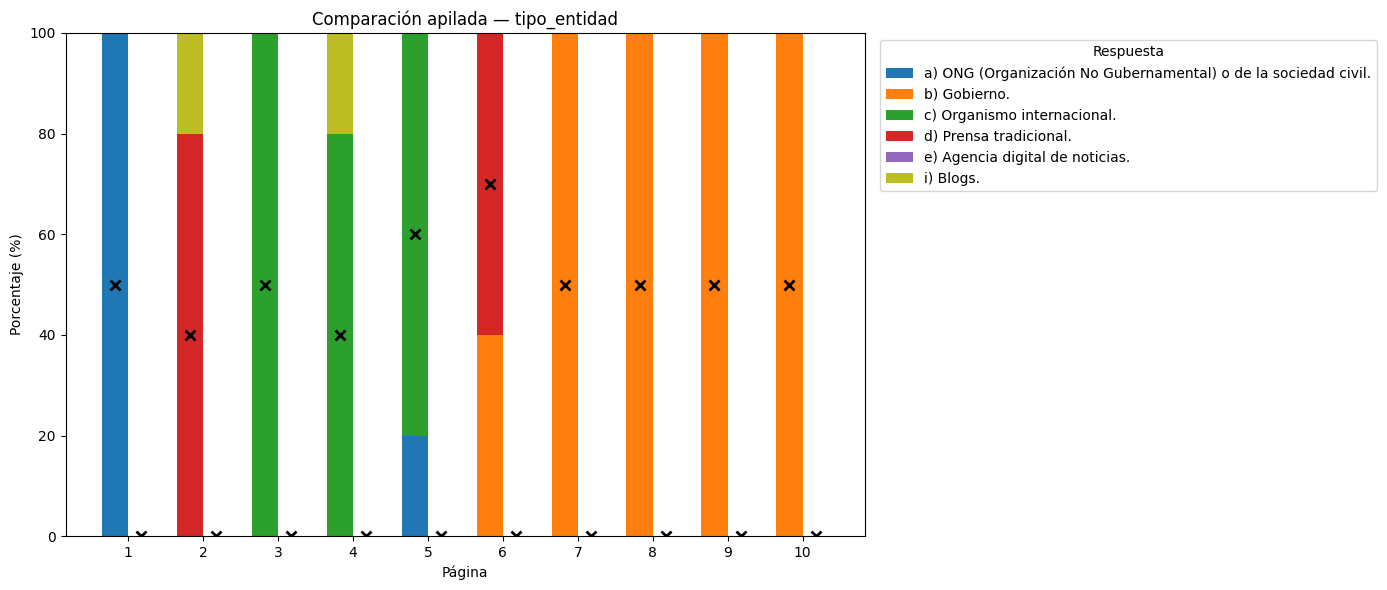

Precisión para origen_entidad: 0.60


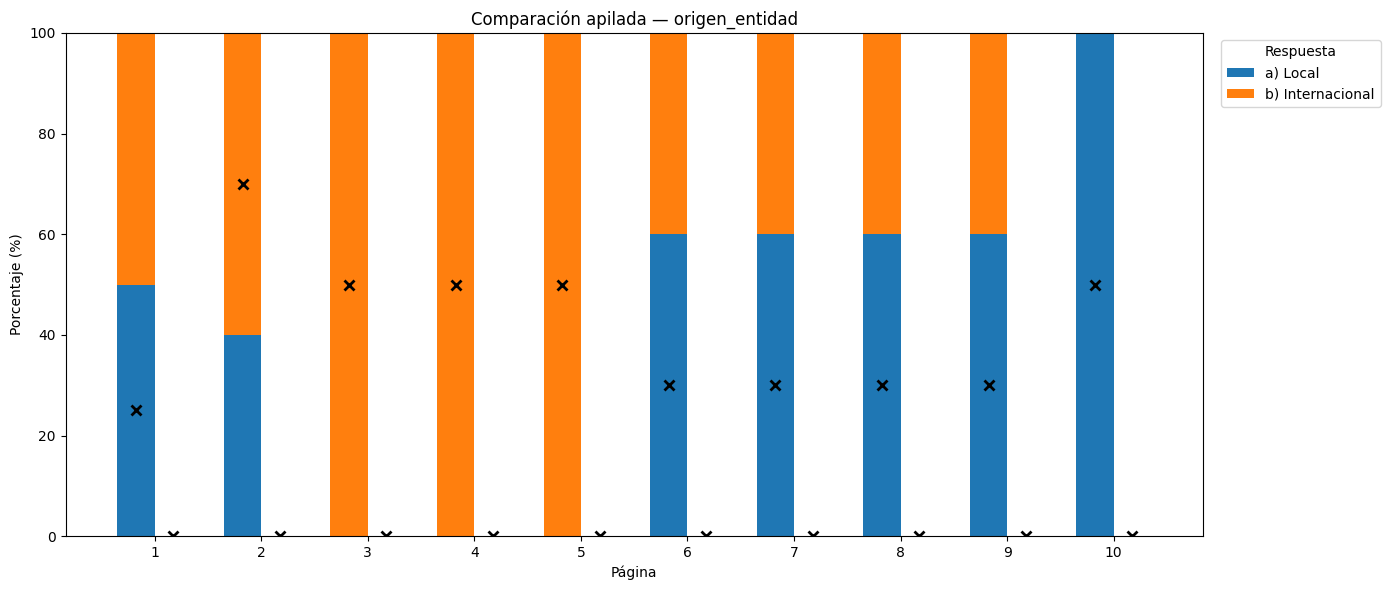

[proposito] Jaccard medio = 0.000


/tmp/ipykernel_41359/3093648472.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


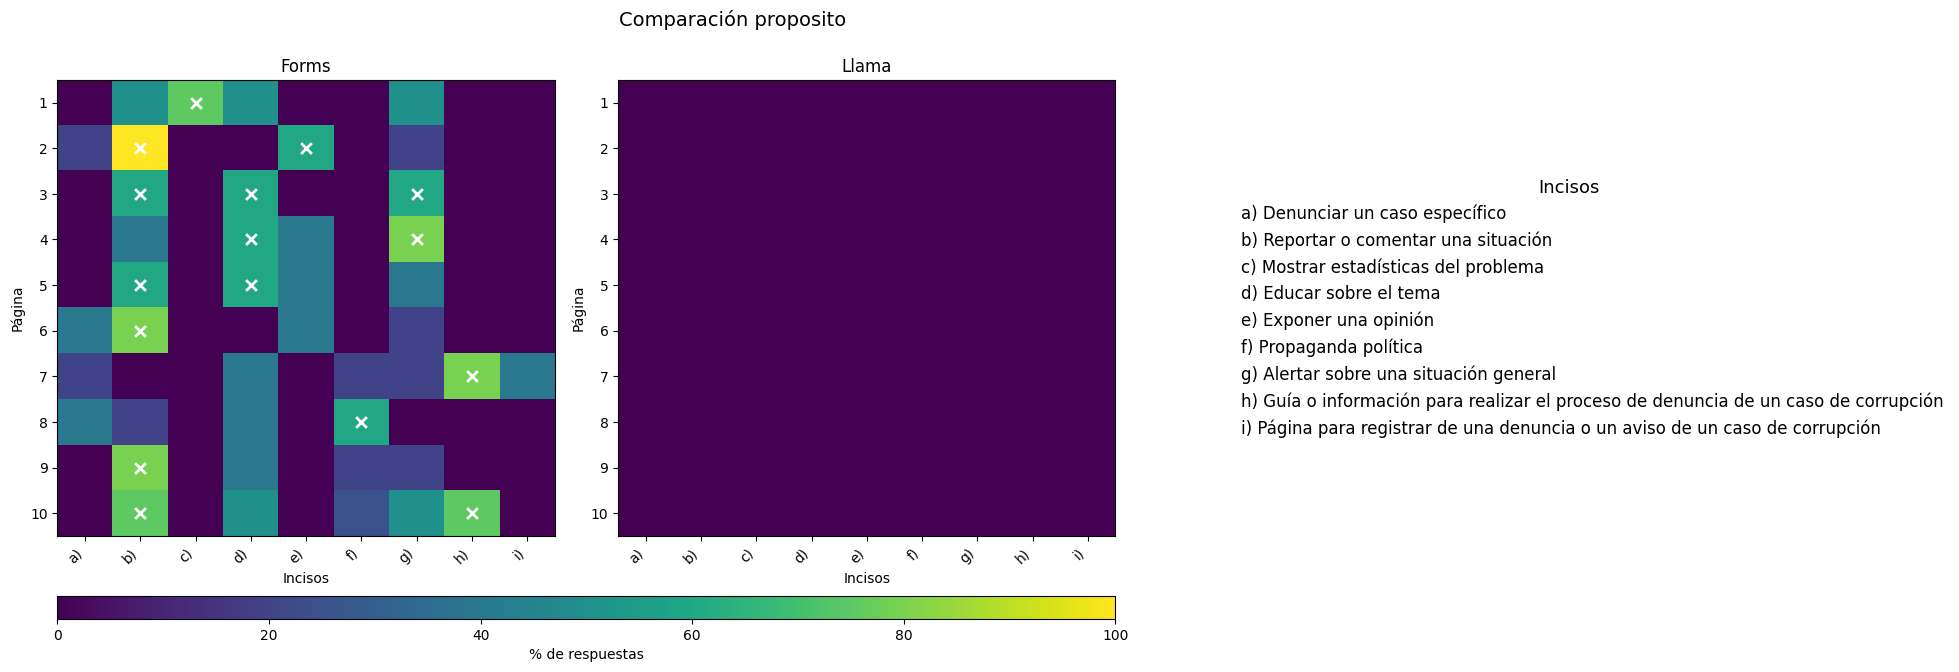

[informacion_presentada] Jaccard medio = 0.000


/tmp/ipykernel_41359/3093648472.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


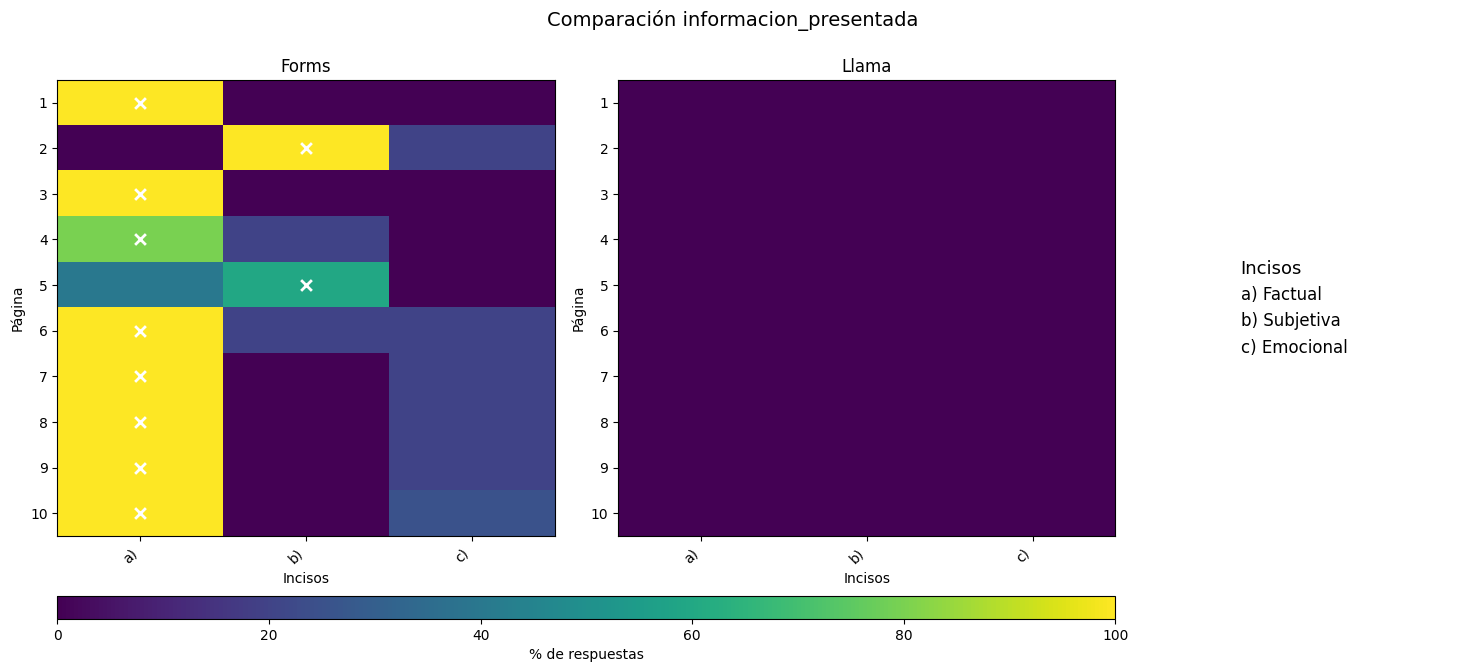

Precisión para vision: 0.00


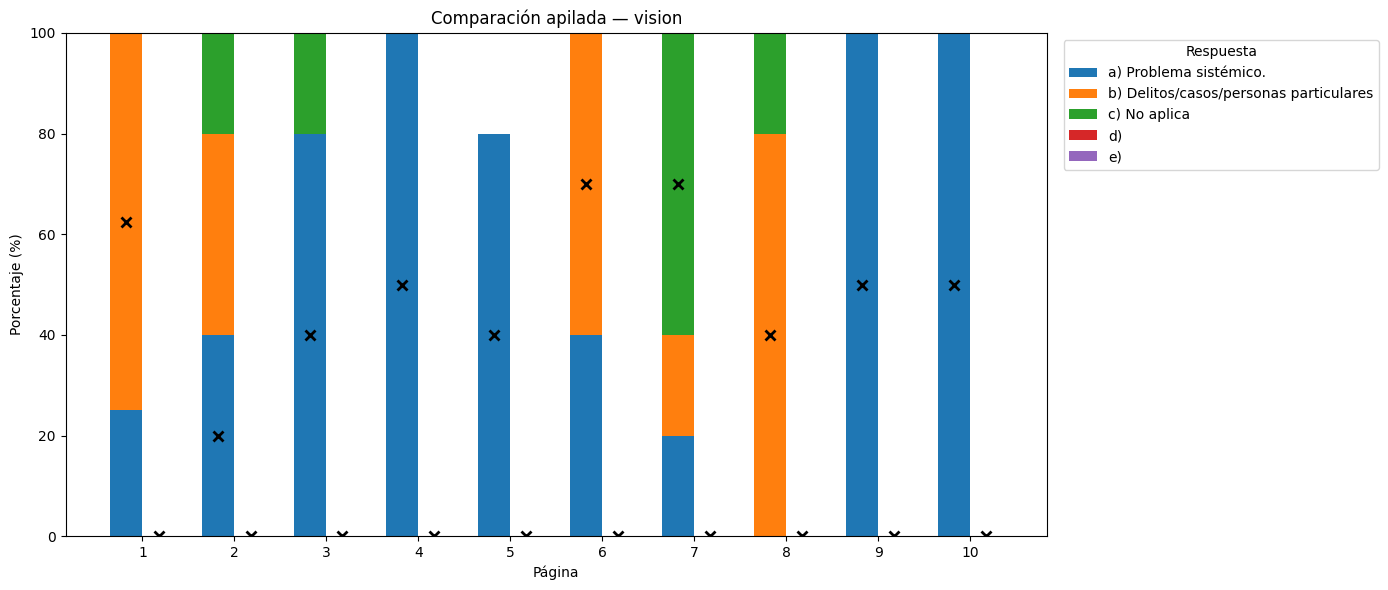

[consecuencias] Jaccard medio = 0.200


/tmp/ipykernel_41359/3093648472.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


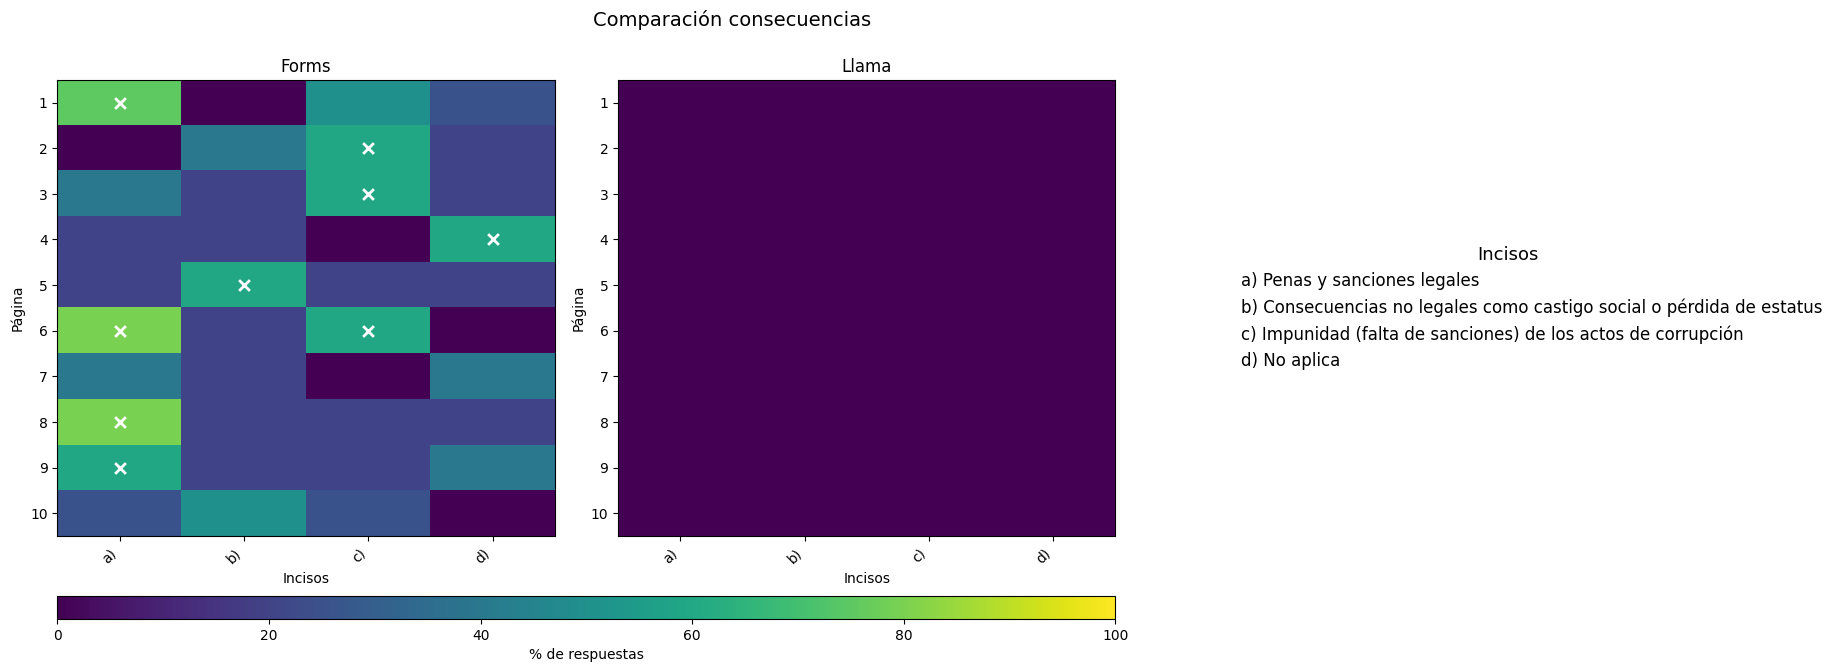

Precisión para que_muestra: 0.00


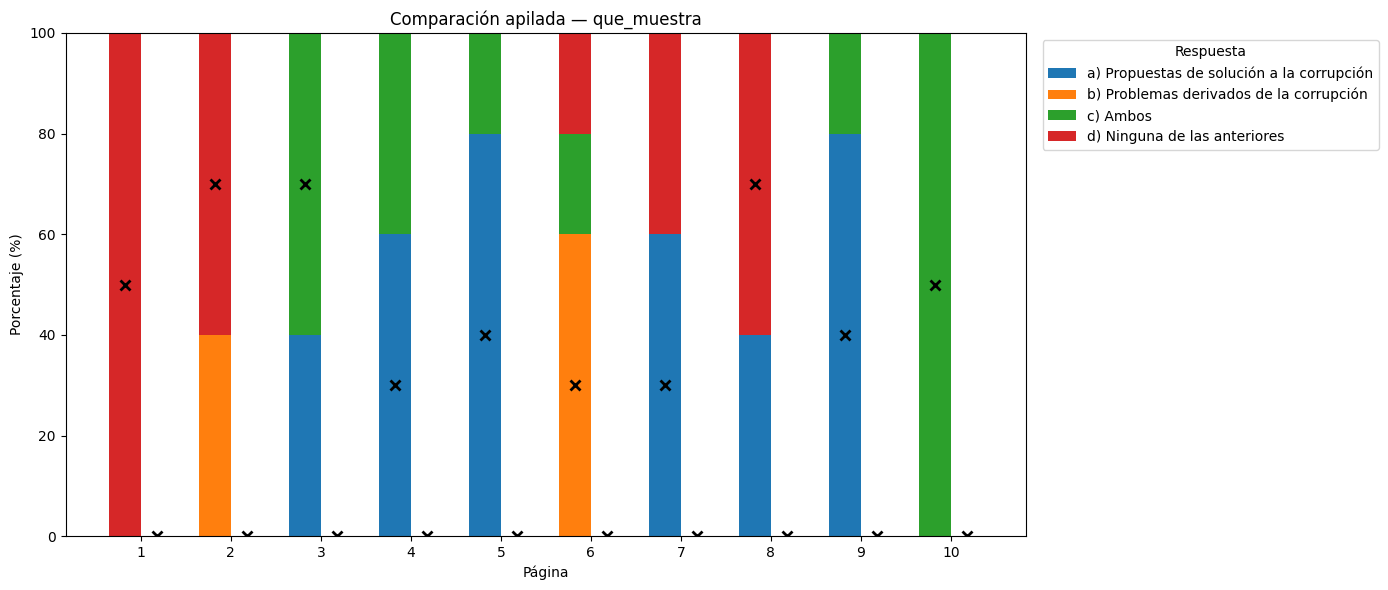

[intencion] Jaccard medio = 0.200


/tmp/ipykernel_41359/3093648472.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


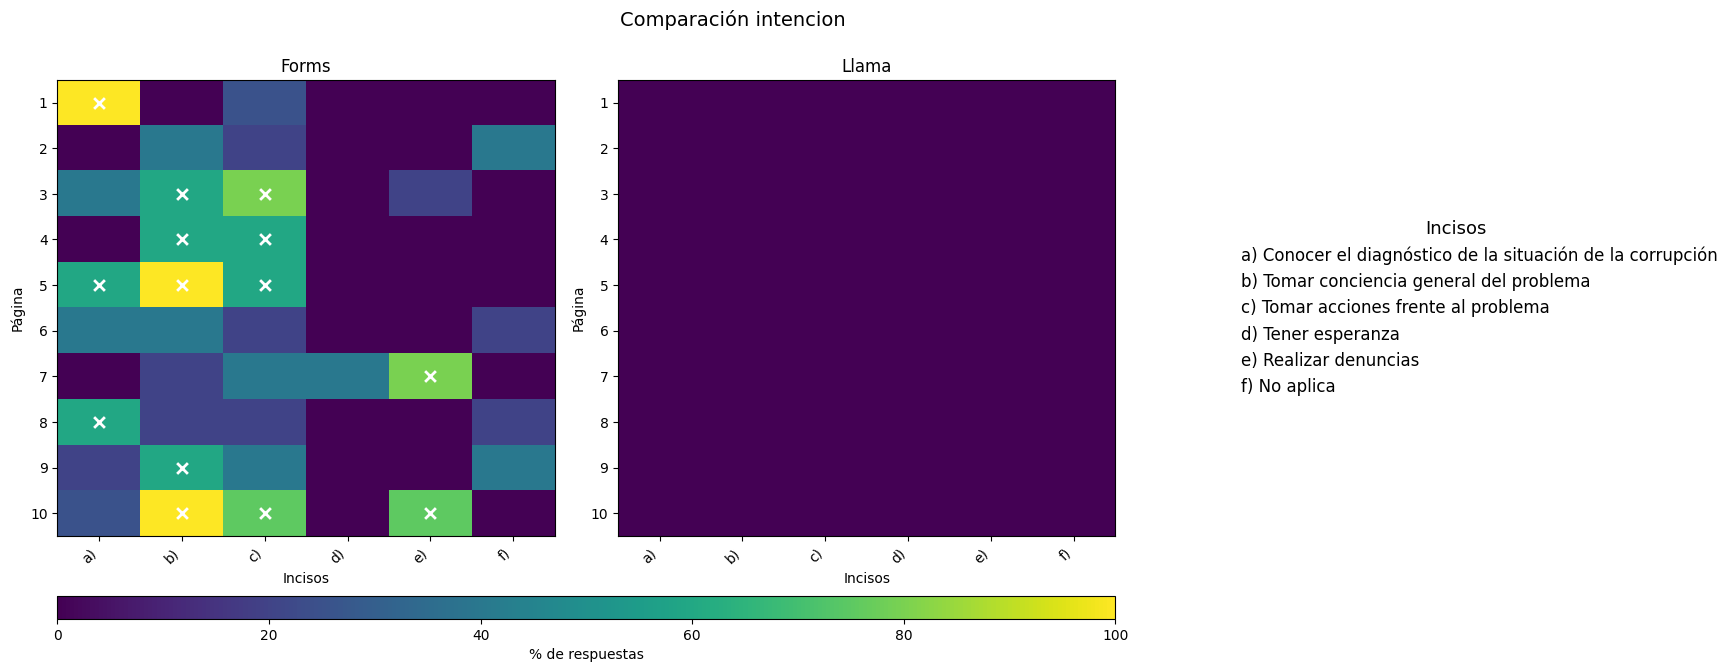

[localizacion_problema] Jaccard medio = 0.000


/tmp/ipykernel_41359/3093648472.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


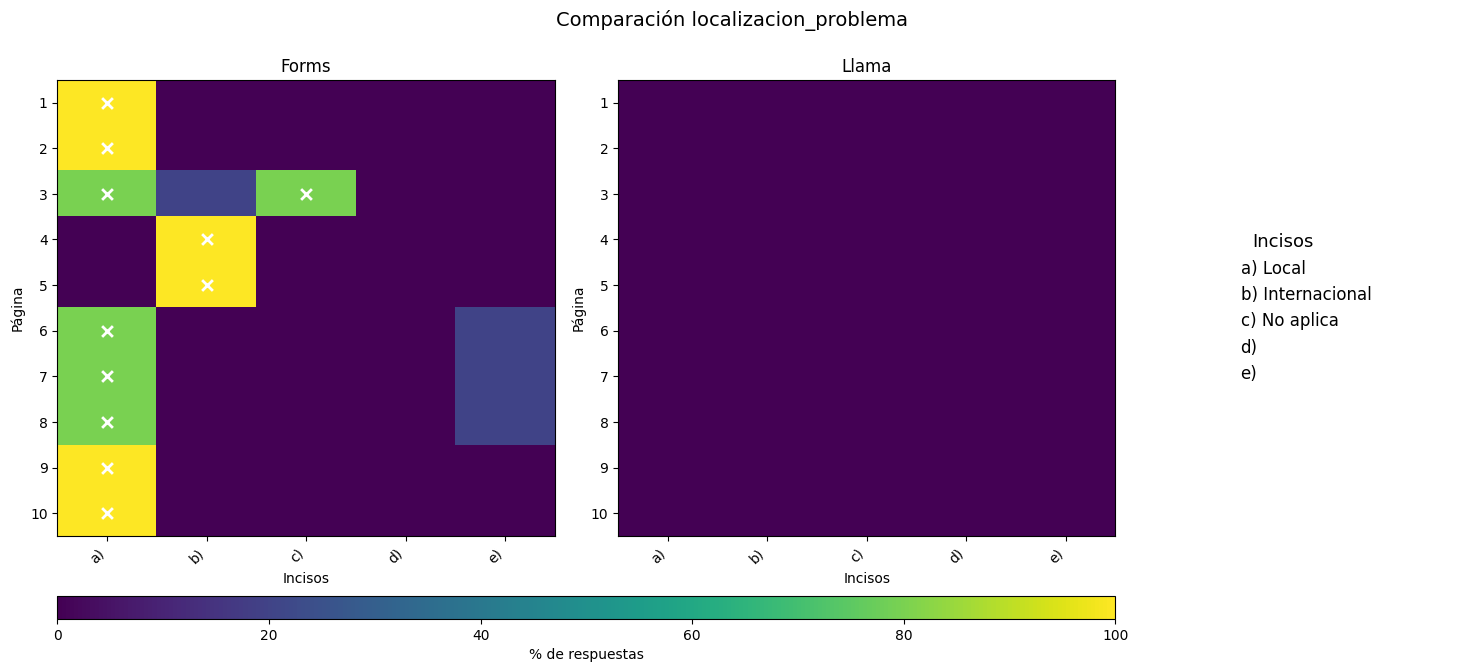

[involucrados] Jaccard medio = 0.000


/tmp/ipykernel_41359/3093648472.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


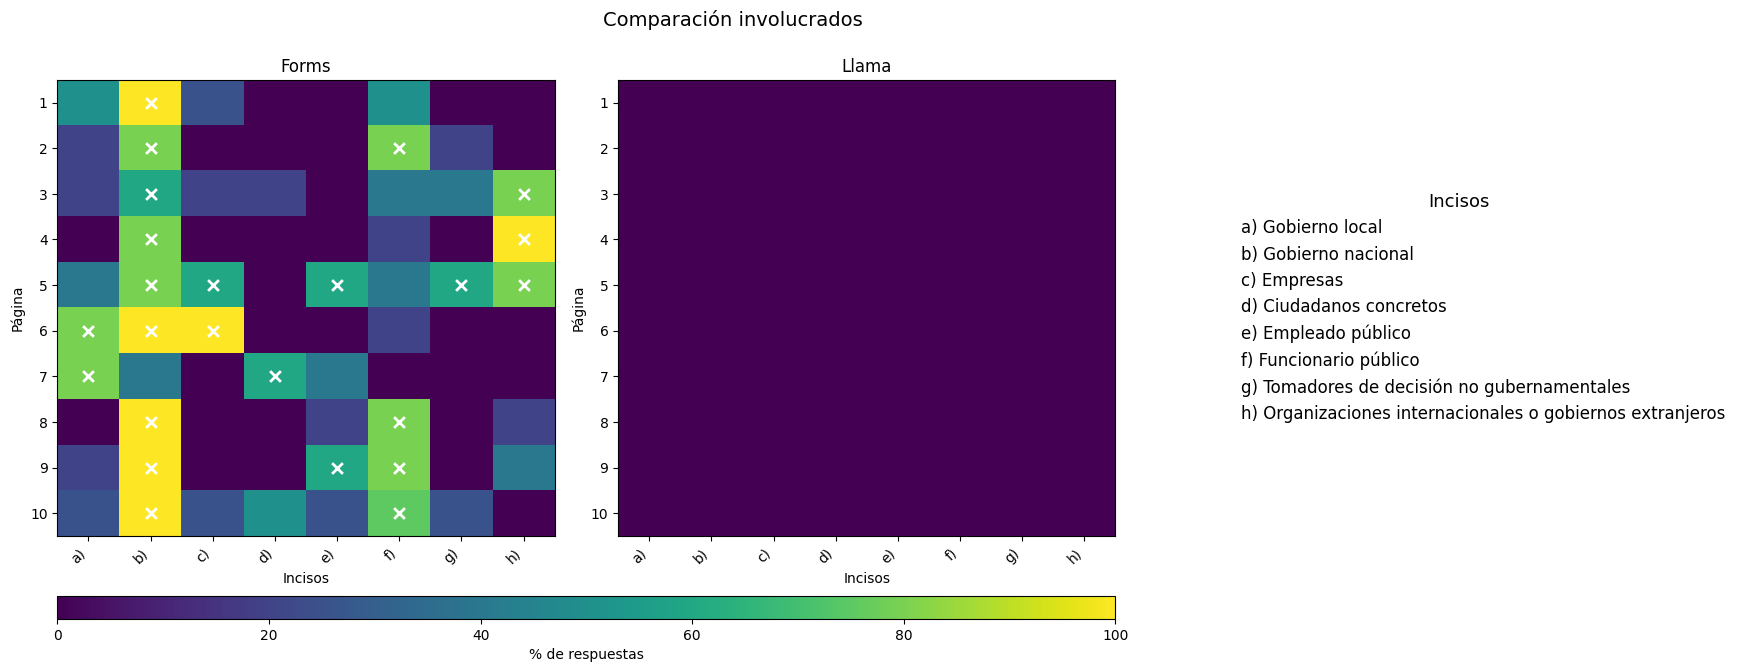

Precisión para formalidad: 0.00


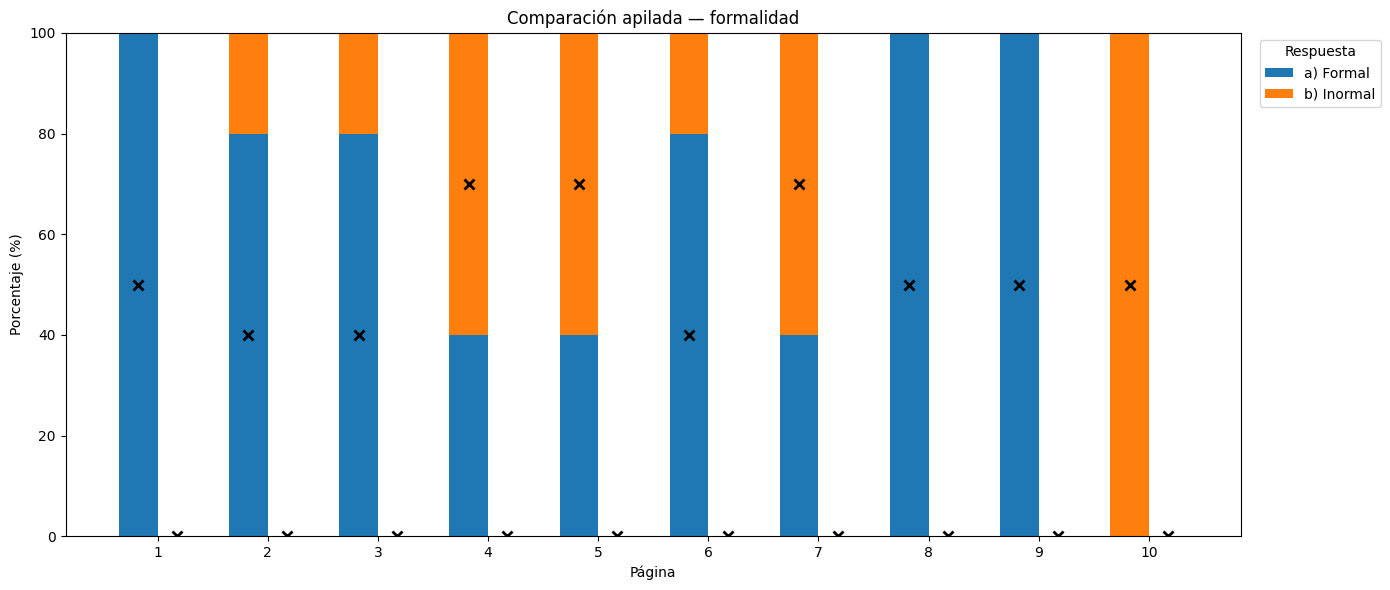

Precisión para nivel_educacion: 0.00


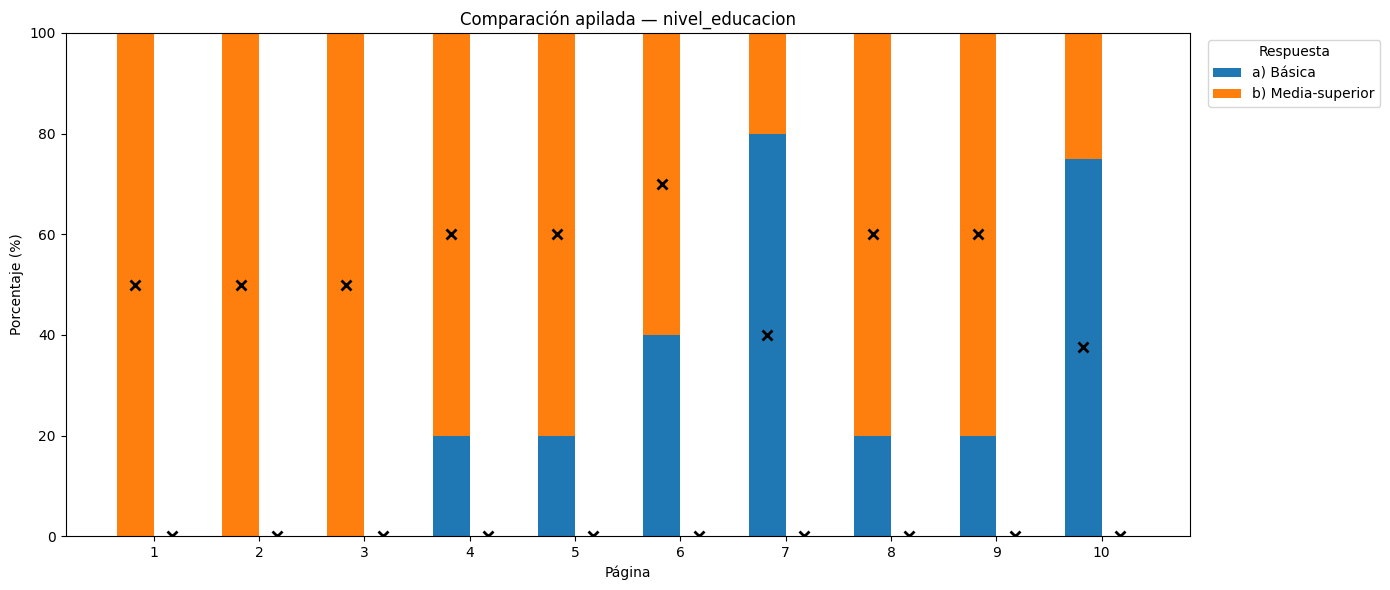

Precisión para tono: 0.10


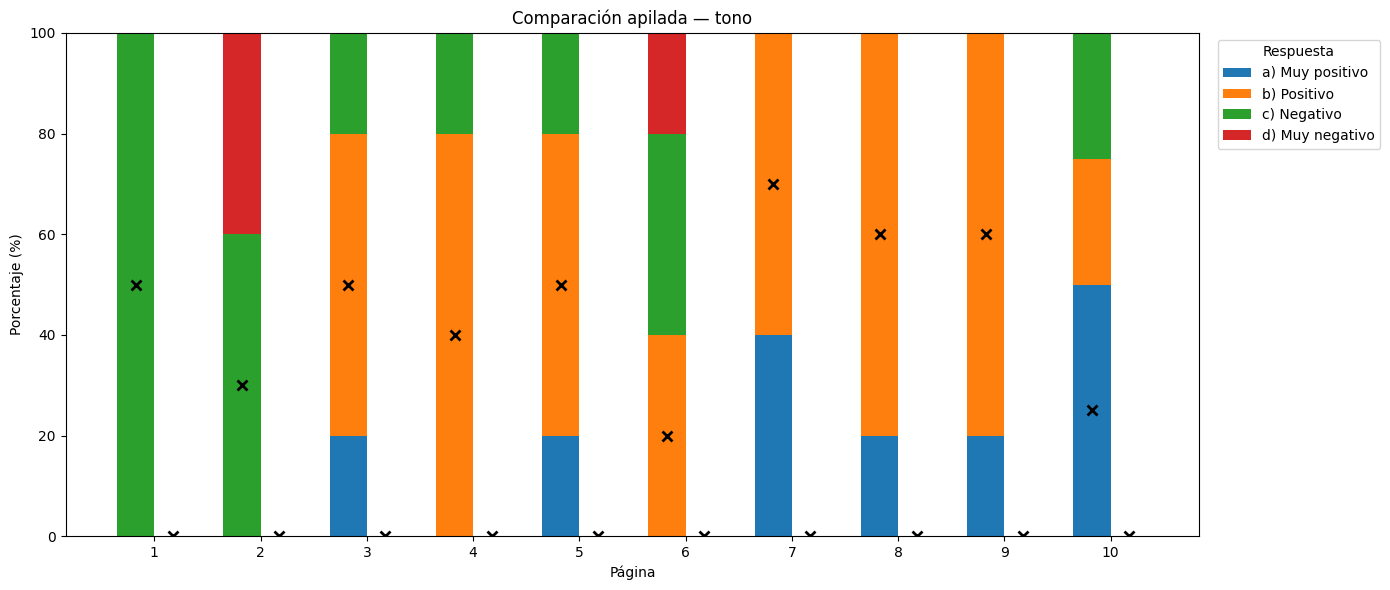

[emociones] Jaccard medio = 0.200


/tmp/ipykernel_41359/3093648472.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


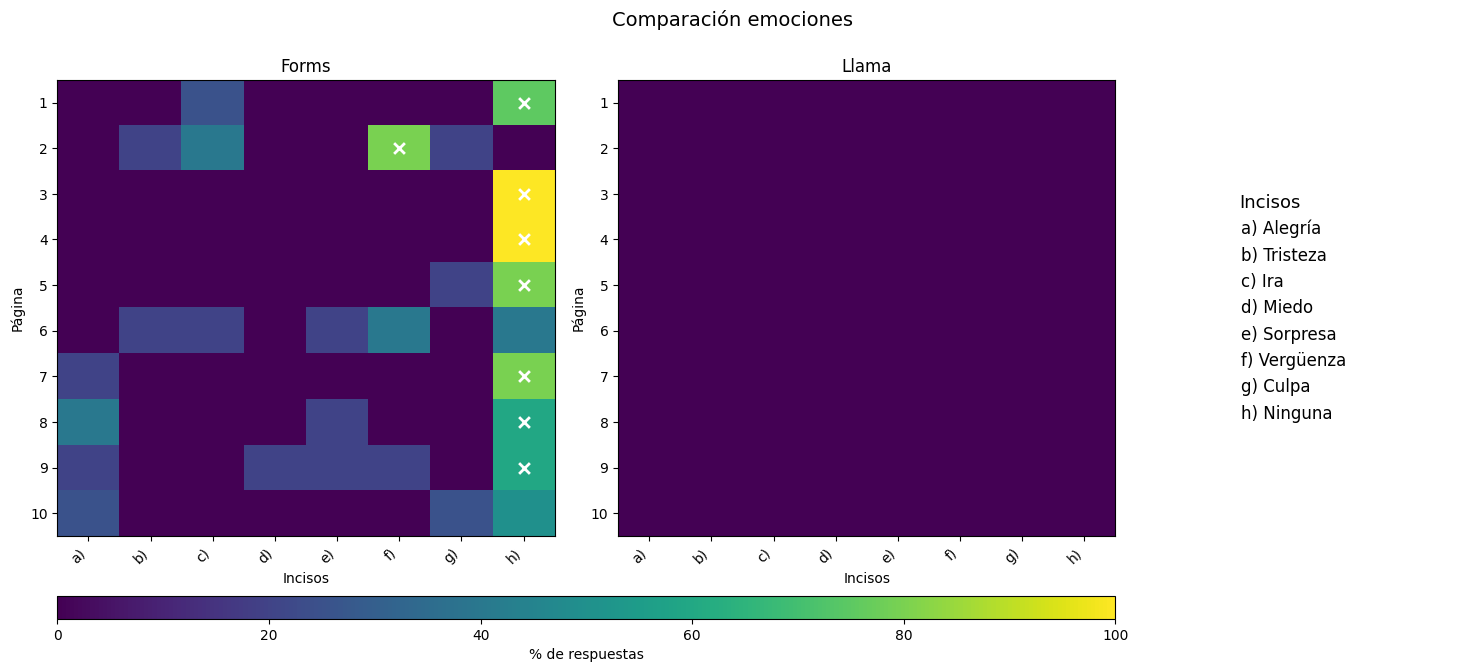

Precisión media (respuestas únicas): 0.114
Jaccard medio (respuestas únicas): 0.086


In [18]:
from sklearn.metrics import accuracy_score

porcentaje_concenso = 60

orden = {}
orden_paginas = list(range(1, 11))

preguntas = df_forms.columns[1:]
orden_cols = ['pagina', 'tipo_entidad', 'origen_entidad', 'proposito',
              'informacion_presentada', 'vision', 'consecuencias', 'que_muestra',
              'intencion', 'localizacion_problema', 'involucrados', 'formalidad',
              'nivel_educacion', 'tono', 'emociones'
              ]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localizacion_problema", "involucrados", "emociones"]
incisos_posibles = {"proposito": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)'],
                    "informacion_presentada": ['a)', 'b)', 'c)'],
                    "consecuencias": ['a)', 'b)', 'c)', 'd)'],
                    "intencion": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)'],
                    "localizacion_problema": ['a)', 'b)', 'c)', 'd)', 'e)'],
                    "involucrados": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)'],
                    "emociones": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
                    }

#out = Path("./graficas")
#out.mkdir(exist_ok=True)

# Paleta de colores global
inc = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]
colores = plt.cm.tab10.colors  # o 'tab20', 'Set3', etc.
color_map = {c: colores[i % len(colores)] for i, c in enumerate(inc)}

mean_acc = []
mean_jac = []

for p in preguntas:
    if p not in multi_answer:
        tabla_forms = calcular_porcentajes(df_forms, p, orden_paginas).reindex(orden_paginas)
        tabla_llama = calcular_porcentajes(df_llama, p, orden_paginas).reindex(orden_paginas)
        valid = (tabla_forms.sum(axis=1) > 0) | (tabla_llama.sum(axis=1) > 0)
        tf = tabla_forms[valid].fillna(0)
        tl = tabla_llama[valid].fillna(0)

        mayor_forms = tf.idxmax(axis=1)
        mayor_llama = tl.idxmax(axis=1)
        mf_emp = tf.apply(lambda r: set(r.index[r.eq(r.max())]), axis=1)
        ml = tl.idxmax(axis=1)  

        tabla_forms["origen"] = "Forms"
        tabla_llama["origen"] = "Llama"

        acc = np.mean([ml.loc[i] in mf_emp.loc[i] for i in mf_emp.index])
        print(f"Precisión para {p}: {acc:.2f}")
        mean_acc.append(acc)

        df_long = pd.concat([tabla_forms, tabla_llama]).reset_index(names="pagina")
        df_long = df_long.melt(id_vars=["pagina","origen"], var_name="respuesta", value_name="porcentaje")

        pivot = df_long.pivot_table(index=["pagina","origen"], 
                                    columns="respuesta", values="porcentaje", fill_value=0)

        fig, ax = plt.subplots(figsize=(14,6))

        bar_width = 0.35
        x = np.arange(len(orden_paginas))

        cols = [c for c in inc if c in pivot.columns]  # incisos: ['a)','b)',...]
        #colores = plt.rcParams['axes.prop_cycle'].by_key()['color']
        #color_map = {c: colores[i % len(colores)] for i, c in enumerate(cols)}
        etiquetas_largas = {c: incisos_dicts[p].get(c, c) for c in cols}

        for j, origen in enumerate(["Forms","Llama"]):
            bottom = np.zeros(len(orden_paginas))
            vals_df = pivot.xs(origen, level="origen")[cols].reindex(orden_paginas, fill_value=0)
            vals_mat = vals_df.to_numpy()
            max_vals = vals_mat.argmax(axis=1)
            for k, col in enumerate(cols):
                vals = vals_df[col].values
                ax.bar(
                    x + (j-0.5)*bar_width, vals, bar_width,
                    bottom=bottom,
                    color=color_map[col],
                    label=etiquetas_largas[col] if j==0 else "_nolegend_"
                )
                for i_pag, v in enumerate(vals):
                    #if v >= porcentaje_concenso:
                    if max_vals[i_pag] == k:
                        xc = x[i_pag] + (j-0.5)*bar_width
                        yc = bottom[i_pag] + v / 2
                        ax.plot(xc, yc, marker='x', markersize=7, color='k', mew=2)
                bottom += vals

        ax.set_xticks(x)
        ax.set_xticklabels(orden_paginas)
        ax.set_ylabel("Porcentaje (%)")
        ax.set_xlabel("Página")
        ax.set_title(f"Comparación apilada — {p}")
        ax.set_ylim(0, 100)  # misma escala

        ax.legend(title="Respuesta", bbox_to_anchor=(1.01, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    else:
        # ========= MULTI-RESPUESTA (heatmaps) =========
        posibles_list = incisos_posibles[p]
        porcentajes_forms = calcular_porcentajes(df_forms, p, orden_paginas, posibles_list)
        porcentajes_llama = calcular_porcentajes(df_llama, p, orden_paginas, posibles_list)

        act_forms  = conjuntos_activos(porcentajes_forms, porcentaje_concenso)
        act_llama  = conjuntos_activos(porcentajes_llama, porcentaje_concenso)
        jac_series = jaccard(act_forms, act_llama, orden_paginas)
        print(f"[{p}] Jaccard medio = {jac_series.mean():.3f}")
        mean_jac.append(jac_series.mean())

        fig = plt.figure(figsize=(18, 7))

        gs = gridspec.GridSpec(
            2, 3,
            width_ratios=[1, 1, 0.55],     # ajusta 0.55 según lo largo de tus textos
            height_ratios=[20, 1],
            wspace=0.15, hspace=0.25
        )

        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax_leg = fig.add_subplot(gs[0, 2])  # eje exclusivo para la leyenda
        cax = fig.add_subplot(gs[1, 0:2])   # colorbar ocupa las 2 primeras columnas

        im1 = ax1.imshow(porcentajes_forms.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")
        im2 = ax2.imshow(porcentajes_llama.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")

        mask = porcentajes_forms.values >= porcentaje_concenso
        ys, xs = np.where(mask)
        ax1.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

        mask = porcentajes_llama.values >= porcentaje_concenso
        ys, xs = np.where(mask)
        ax2.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

        for ax, data, title in zip([ax1, ax2],
                                [porcentajes_forms, porcentajes_llama],
                                ["Forms", "Llama"]):
            ax.set_xticks(np.arange(data.shape[1]))
            ax.set_xticklabels(posibles_list, rotation=45, ha='right')
            ax.set_yticks(np.arange(data.shape[0])); ax.set_yticklabels(orden_paginas)
            ax.set_xlabel("Incisos"); ax.set_ylabel("Página")
            ax.set_title(title); ax.set_ylim(data.shape[0]-0.5, -0.5)

        cb = fig.colorbar(im1, cax=cax, orientation="horizontal")
        cb.set_label("% de respuestas")

        from matplotlib.patches import Patch
        long_labels = [incisos_dicts[p].get(k, k) for k in posibles_list]
        dummy = [Patch(facecolor='none', edgecolor='none') for _ in long_labels]

        ax_leg.axis('off')
        ax_leg.legend(
            dummy, long_labels,
            title="Incisos",
            loc="center left", bbox_to_anchor=(0.0, 0.5),
            frameon=False, fontsize=12, title_fontsize=13
        )

        fig.suptitle(f"Comparación {p}", y=0.98, fontsize=14)
        plt.tight_layout()
        plt.show()

print(f"Precisión media (respuestas únicas): {np.mean(mean_acc):.3f}")
print(f"Jaccard medio (respuestas únicas): {np.mean(mean_jac):.3f}")

# Llama

In [ ]:
path = "./incisos_pol.csv"
df = pd.read_csv(path, header=0, sep=';')
df.drop(columns=['version'], inplace=True)
df.head()

,pagina,tipo_entidad,origen_entidad,proposito,informacion_presentada,vision,consecuencias,que_muestra,intencion,localizacion_problema,involucrados,formalidad,nivel_educacion,tono,emociones
0,2,b),a),d),a),a),c),b),b),b),a) b) e) f),a),c),a),e)
1,8,b),a),b),a),a),a),a),b),b),b),a),b),a),a)
2,4,b),a),e),a),a),a),c),b),b),"a), b), f)",a),b),b),h)
3,8,b),a),b),a),a),b),a),a),b),b),a),b),b),a)
4,2,b),a),h),a),a),a),c),b),b),b),a),a),a),g)


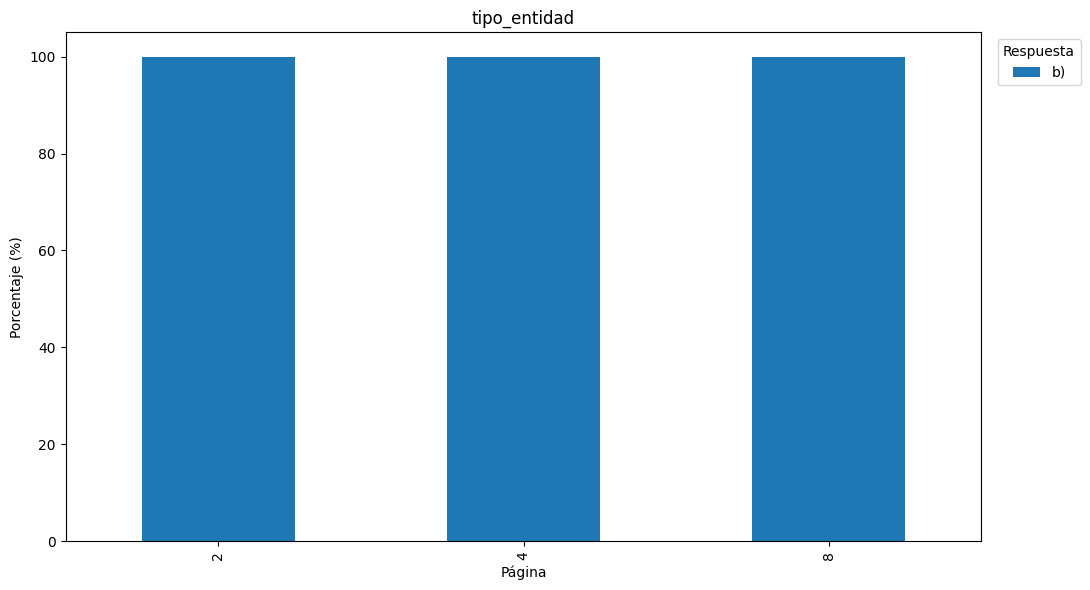

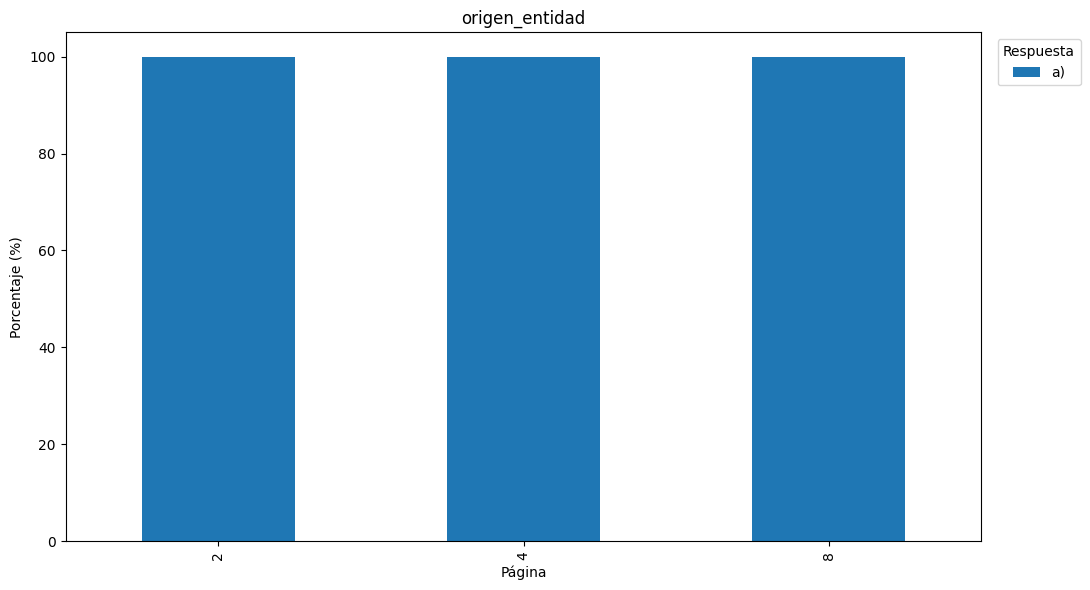

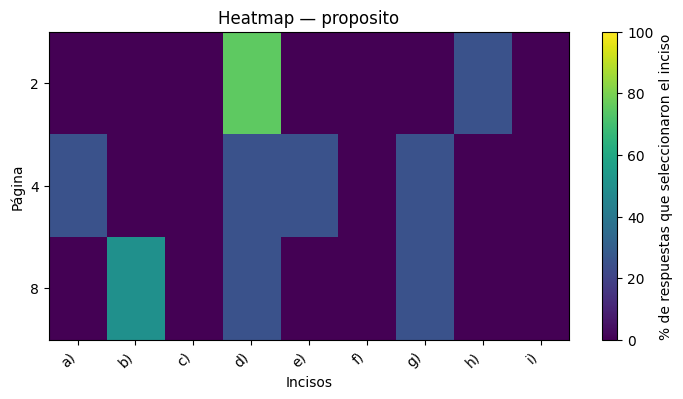

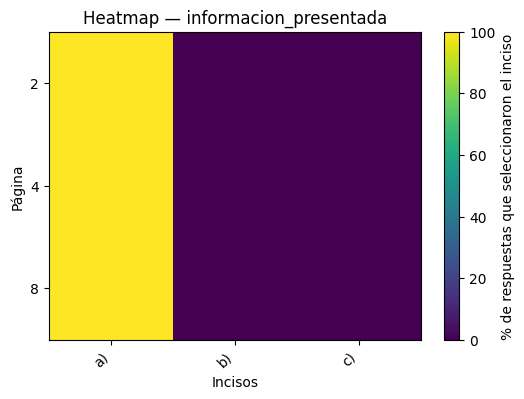

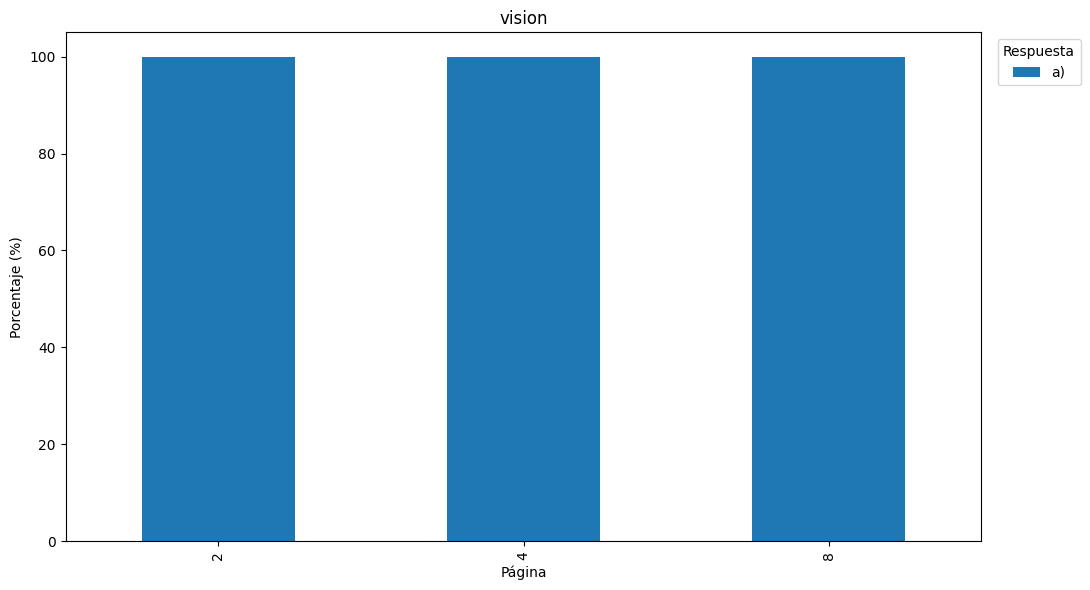

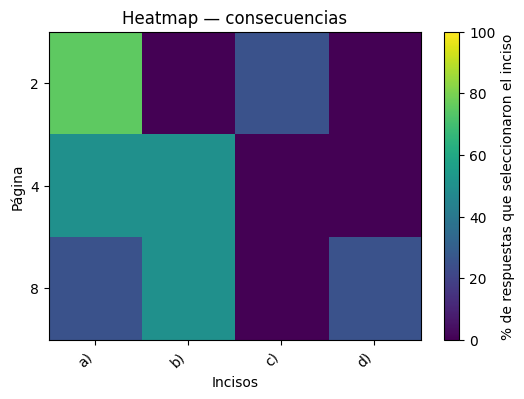

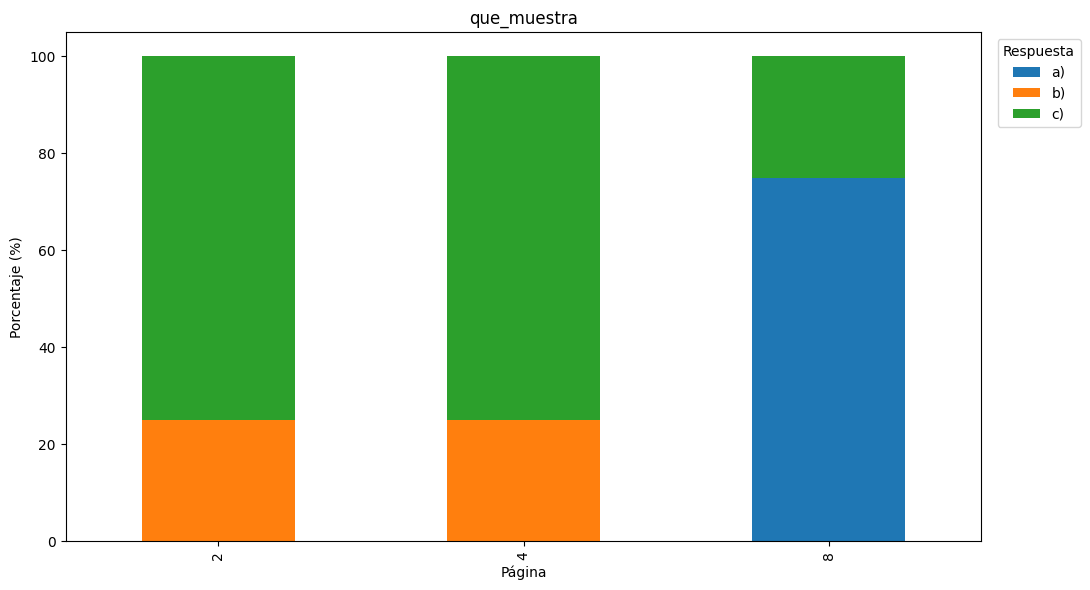

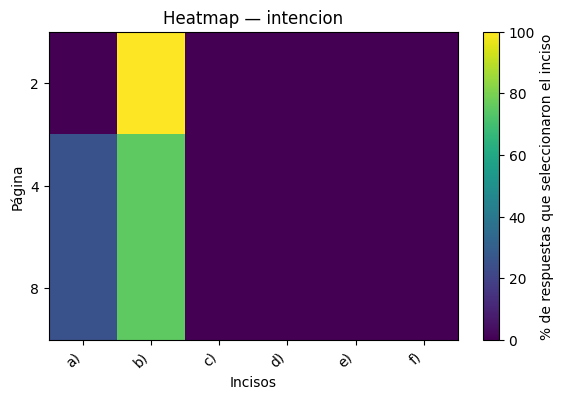

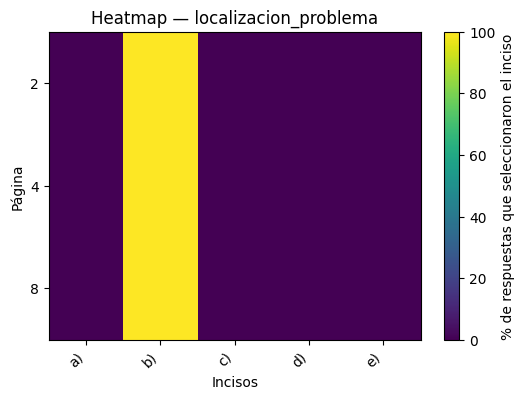

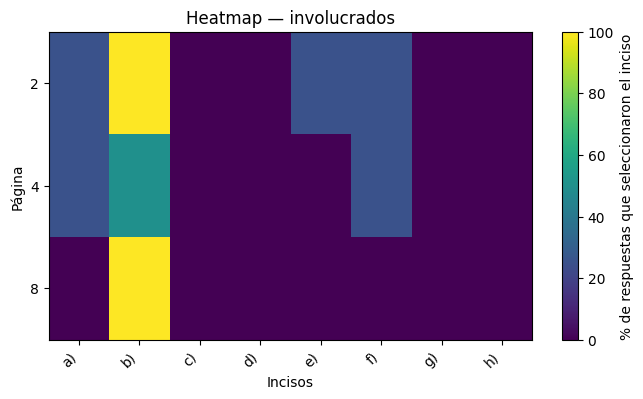

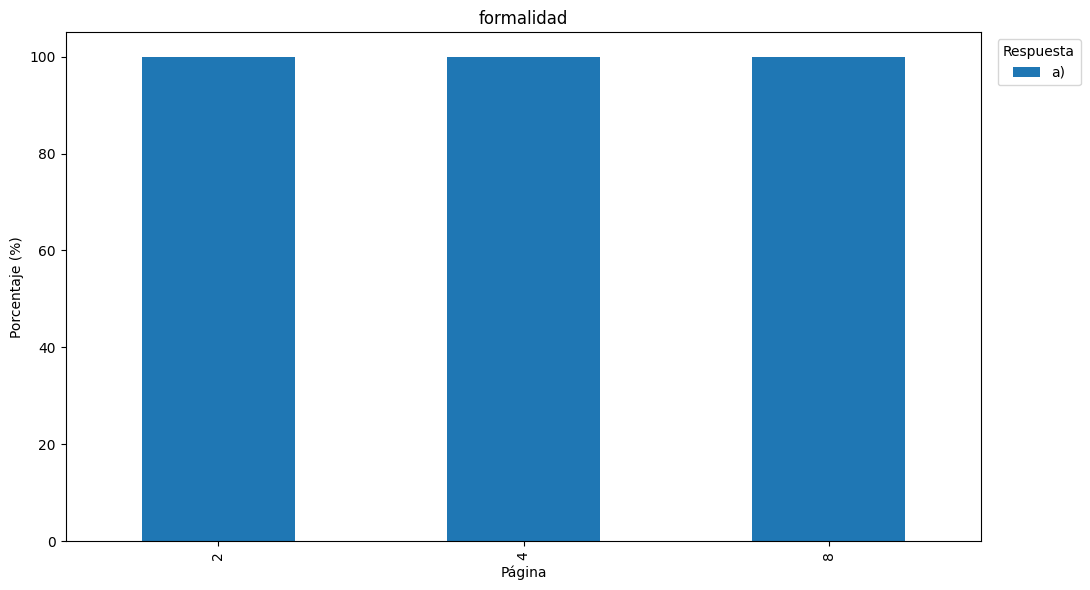

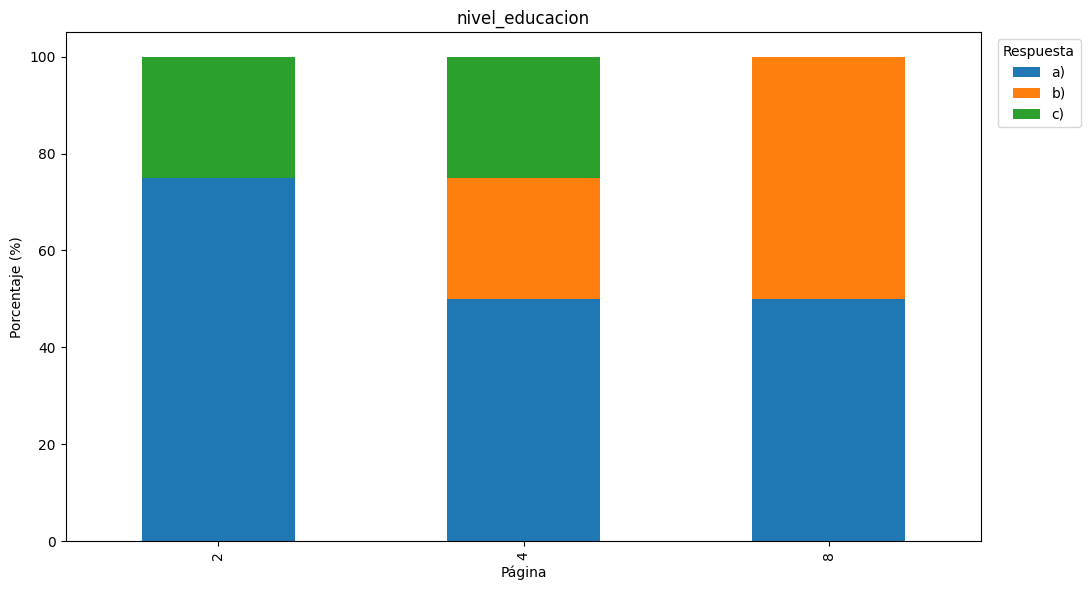

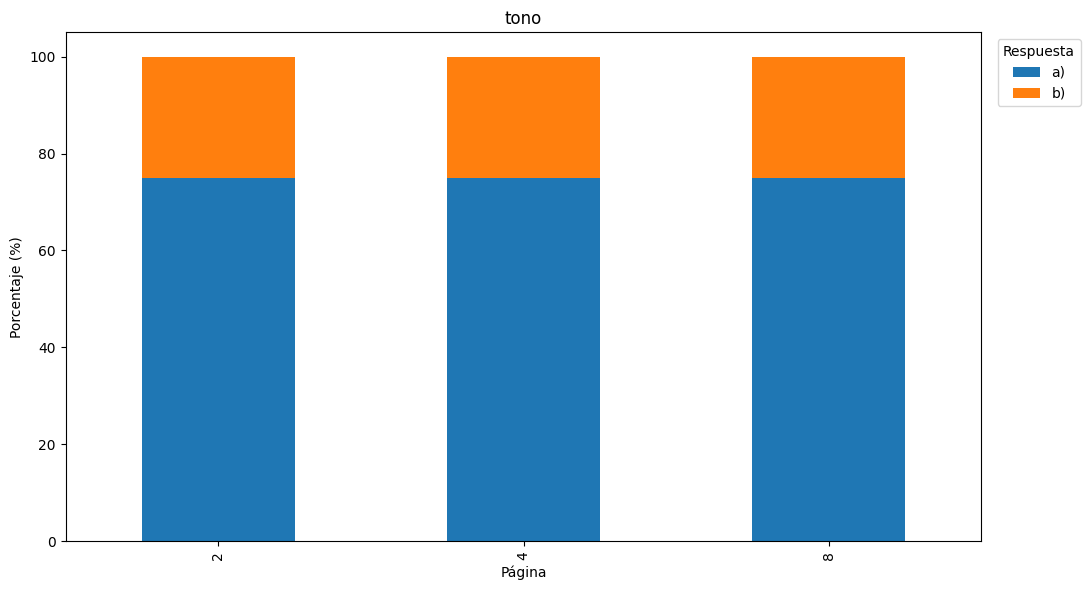

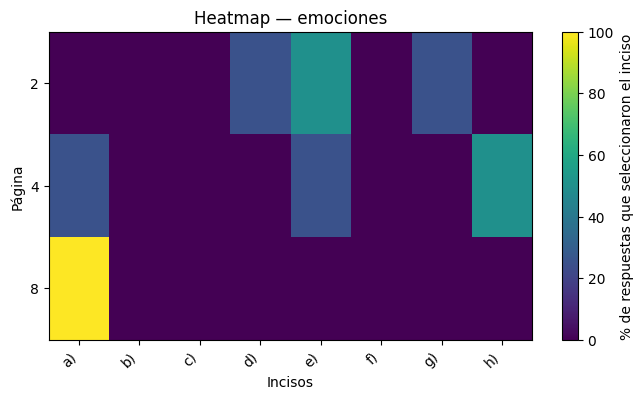

In [ ]:
orden = {}
orden_paginas = [2, 4, 8]

preguntas = df.columns[1:]
orden_cols = ['pagina', 'tipo_entidad', 'origen_entidad', 'proposito',
              'informacion_presentada', 'vision', 'consecuencias', 'que_muestra',
              'intencion', 'localizacion_problema', 'involucrados', 'formalidad',
              'nivel_educacion', 'tono', 'emociones'
              ]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localizacion_problema", "involucrados", "emociones"]
incisos_posibles = {"proposito": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)'],
                    "informacion_presentada": ['a)', 'b)', 'c)'],
                    "consecuencias": ['a)', 'b)', 'c)', 'd)'],
                    "intencion": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)'],
                    "localizacion_problema": ['a)', 'b)', 'c)', 'd)', 'e)'],
                    "involucrados": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)'],
                    "emociones": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
                    }

out = Path("./graficas")
out.mkdir(exist_ok=True)

for i, p in enumerate(preguntas, start=1):
    if p not in multi_answer:
        tabla = (df.groupby(["pagina", p]).size().unstack(fill_value=0))
        tabla = tabla.reindex(orden_paginas, fill_value=0)
        tabla = tabla.div(tabla.sum(axis=1).replace(0,1), axis=0) * 100
        ylabel = "Porcentaje (%)"

        ax = tabla.plot(kind="bar", stacked=True, figsize=(11, 6))
        ax.set_title(f"{p}")
        ax.set_xlabel("Página")
        ax.set_ylabel(ylabel)
        ax.legend(title="Respuesta", bbox_to_anchor=(1.01, 1), loc="upper left")
        plt.tight_layout()
        plt.show()
    else:
        posibles_list = incisos_posibles[p]
        posibles_set = set(incisos_posibles[p])
        tmp = df[["pagina", p]].copy()
        tmp["inciso"] = tmp[p].apply(
            lambda s: list(dict.fromkeys(t for t in s.split() if t in posibles_set))
        )
        den = tmp.groupby("pagina").size().reindex(orden_paginas, fill_value=0)
        expd = tmp.explode("inciso", ignore_index=True)
        counts = expd.groupby(["pagina", "inciso"]).size().unstack(fill_value=0)
        counts = counts.reindex(orden_paginas, columns=posibles_list, fill_value=0)
        porcentajes = counts.div(den.replace(0,1), axis=0) * 100

        data = porcentajes.values
        fig, ax = plt.subplots(figsize=(max(6, 0.6*data.shape[1]+3), max(4, 0.5*data.shape[0]+2)))
        im = ax.imshow(data, aspect='auto', vmin=0, vmax=100)

        # Ticks y etiquetas
        ax.set_xticks(np.arange(data.shape[1]))
        ax.set_yticks(np.arange(data.shape[0]))
        ax.set_xticklabels(posibles_list, rotation=45, ha='right')
        ax.set_yticklabels(orden_paginas)

        ax.set_title(f"Heatmap — {p}")
        ax.set_xlabel("Incisos")
        ax.set_ylabel("Página")
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('% de respuestas que seleccionaron el inciso', rotation=90)

        # Evita cortar primera/última fila
        ax.set_ylim(data.shape[0]-0.5, -0.5)

        '''plt.tight_layout()
        plt.savefig(out / f"heatmap_{p}.png", dpi=150, bbox_inches='tight')
        plt.show()
        plt.close(fig)'''
        plt.show()